In [ ]:
### ITOM 6267 HW 2 
### Submitted By Group 20: Scarlett Zhao, Madeline Garza, Yuchen Huang, Christina Limbo

In [2]:
import math
from sklearn.preprocessing import StandardScaler # for normalization
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import sklearn.metrics as metrics
import warnings
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
### Load data
### Rename columns

import pandas as pd
data = pd.read_csv('C:/Users/chris/OneDrive - Southern Methodist University/Documents/SMU MSBA/Fall Term 2021/Fall Mod B/ITOM 6267/default_of_credit_card_clients.csv', skiprows=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [17]:
### remove ID
data = data.drop(['ID'], axis=1)

In [18]:
# Q1.1: How many customers are in the sample? 
## There are 30000 customers in the sample.
data.shape

(30000, 24)

In [23]:
# Q1.2 What is the most common sex in the sample?
Sex_comm=data['SEX'].value_counts()
Sex_comm
## Female is the most common sex in the sample.

2    18112
1    11888
Name: SEX, dtype: int64

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

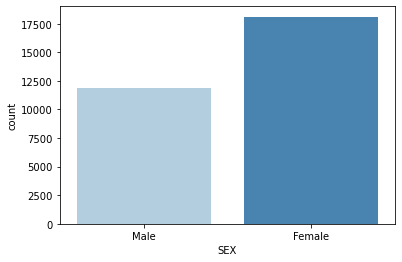

In [24]:
ax1 = sns.countplot(x="SEX", data=data, palette="Blues")
ax1.set_xticklabels(['Male','Female'])

In [25]:
# Q1.3 Which sex has the most defaults?
sex_default_female = data[(data['SEX']==2) & (data['default payment next month']==1)]
sex_default_female.count()
## Female has more defaults.
### 3763 defaults in Female
### 2873 defaults in Male

LIMIT_BAL                     3763
SEX                           3763
EDUCATION                     3763
MARRIAGE                      3763
AGE                           3763
PAY_0                         3763
PAY_2                         3763
PAY_3                         3763
PAY_4                         3763
PAY_5                         3763
PAY_6                         3763
BILL_AMT1                     3763
BILL_AMT2                     3763
BILL_AMT3                     3763
BILL_AMT4                     3763
BILL_AMT5                     3763
BILL_AMT6                     3763
PAY_AMT1                      3763
PAY_AMT2                      3763
PAY_AMT3                      3763
PAY_AMT4                      3763
PAY_AMT5                      3763
PAY_AMT6                      3763
default payment next month    3763
dtype: int64

In [26]:
# Q1.3 Which sex has the most defaults?
sex_default_male= data[data['SEX']==1]
sex_default_male[sex_default_male['default payment next month']==1].count()

## Female has more defaults.
### 3763 defaults in Female
### 2873 defaults in Male

LIMIT_BAL                     2873
SEX                           2873
EDUCATION                     2873
MARRIAGE                      2873
AGE                           2873
PAY_0                         2873
PAY_2                         2873
PAY_3                         2873
PAY_4                         2873
PAY_5                         2873
PAY_6                         2873
BILL_AMT1                     2873
BILL_AMT2                     2873
BILL_AMT3                     2873
BILL_AMT4                     2873
BILL_AMT5                     2873
BILL_AMT6                     2873
PAY_AMT1                      2873
PAY_AMT2                      2873
PAY_AMT3                      2873
PAY_AMT4                      2873
PAY_AMT5                      2873
PAY_AMT6                      2873
default payment next month    2873
dtype: int64

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

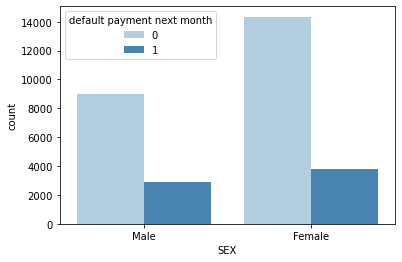

In [27]:
ax2 = sns.countplot(x="SEX", hue="default payment next month", data=data, palette="Blues")
ax2.set_xticklabels(['Male','Female'])

In [28]:
# Q1.4 How many distinct values does marriage take on?
marriage_unique=data.MARRIAGE.unique()
marriage_unique
## MARRIAGE takes 4 distinct values.

array([1, 2, 3, 0], dtype=int64)

In [29]:
## MARRIAGE Should have only 3 unique values: Marital status (1 = married; 2 = single; 3 = others)
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

[Text(0, 0, 'Married'), Text(1, 0, 'Single'), Text(2, 0, 'Others')]

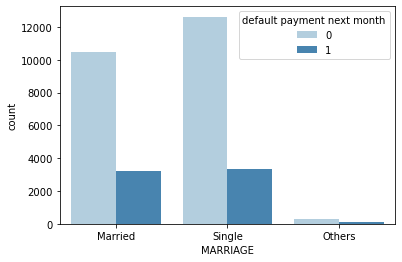

In [30]:
ax2 = sns.countplot(x="MARRIAGE", hue="default payment next month", data=data, palette="Blues")
ax2.set_xticklabels(['Married','Single','Others'])

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

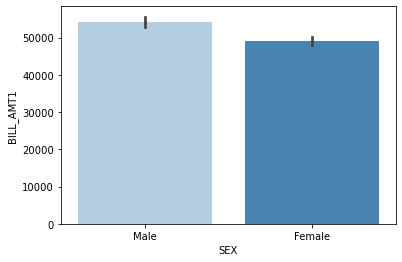

In [31]:
# Q2.1 How is BILL_AMT1 distributed by sex?
ax3 = sns.barplot(data=data, x="SEX", y="BILL_AMT1", palette="Blues")
ax3.set_xticklabels(['Male','Female'])
## Males have slightly higher average BILL_AMT1 than Females

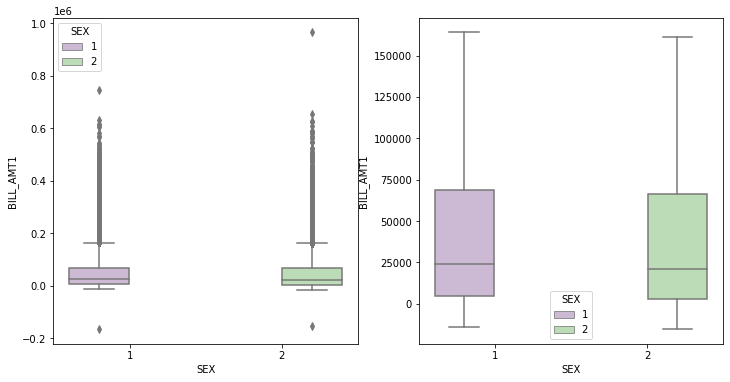

In [32]:
# Q2.1 How is BILL_AMT1 distributed by sex?
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="BILL_AMT1", hue="SEX",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="BILL_AMT1", hue="SEX",data=data, palette="PRGn",showfliers=False)
plt.show();

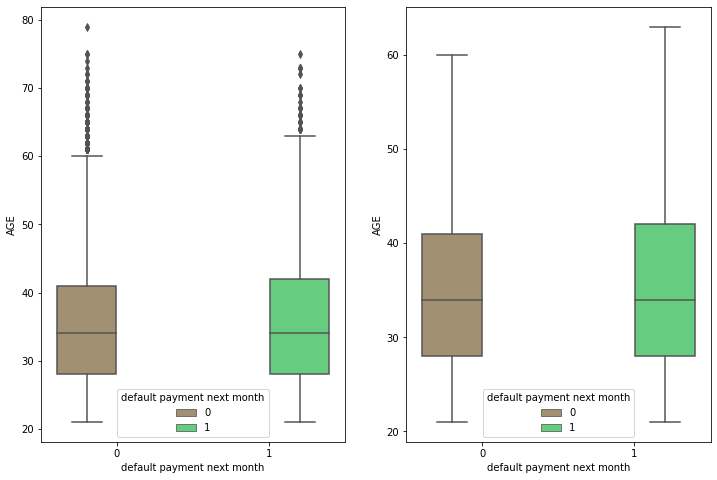

In [34]:
# Q2.2 Does there appear to be any relationship between default and AGE?
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(12,8))
s3 = sns.boxplot(ax = ax3, x="default payment next month", y="AGE", hue="default payment next month",data=data, palette="terrain_r",showfliers=True)
s4 = sns.boxplot(ax = ax4, x="default payment next month", y="AGE", hue="default payment next month",data=data, palette="terrain_r",showfliers=False)
plt.show()
## There appears to be a relationship between default payment next month and AGE
## Tendency of default seems to decrease with AGE
## Since there is a relationship, we can construct an accurate predictor of DEFAULT using AGE

In [61]:
#Q2.2 Does there appear to be any relationship between default and AGE?
##There appears to be a relatinship between default payment next month and AGE, correlation coefficient = 0.014, p-value = 0.016
##check for correlation
from scipy.stats import pearsonr
data1 = data['default payment next month']
data2 = data['AGE']
r, p = pearsonr(data1, data2)
print('r=%.3f, p=%.3f' % (r, p))

##compare p-value with alpha
if p > 0.05: 
    print('No relationship')
else:
    print('There is a relationship')


r=0.014, p=0.016
There is a relationship


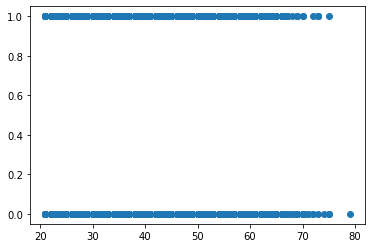

In [37]:
from matplotlib import pyplot
pyplot.scatter(data['AGE'], data['default payment next month'])
pyplot.show()

In [40]:
# missing values
missing = data.isnull().sum()
missing
## no missing values

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [41]:
# EDUCATION
## EDUCATION should only have 4 unique values: (1 = graduate school; 2 = university; 3 = high school; 4 = others)
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [42]:
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

[Text(0, 0, 'Graduate School'),
 Text(1, 0, 'University'),
 Text(2, 0, 'High School'),
 Text(3, 0, 'Others')]

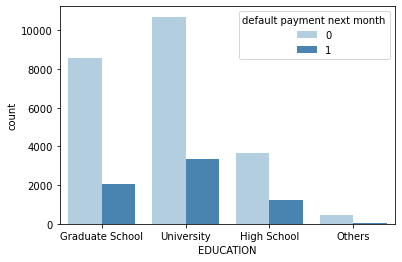

In [43]:
ax4 = sns.countplot(x="EDUCATION", hue="default payment next month", data=data, palette="Blues")
ax4.set_xticklabels(['Graduate School','University','High School', 'Others'])

In [44]:
# Summary Statistics
table1 = data.agg(['min','max','median','mean', 'std', 'skew', 'kurtosis'])
table1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000
median,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
mean,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.681500,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.961470,15666.159744,15278.305679,17777.465775,0.415062
skew,0.992867,-0.424183,0.489720,0.036154,0.732246,0.731975,0.790565,0.840682,0.999629,1.008197,...,2.821965,2.876380,2.846645,14.668364,3.045382e+01,17.216635,12.904985,11.127417,10.640727,1.343504
kurtosis,0.536263,-1.820190,-0.361602,-1.392559,0.044303,2.720715,1.570418,2.084436,3.496983,3.989748,...,11.309325,12.305881,12.270705,415.254743,1.641632e+03,564.311229,277.333768,180.063940,167.161430,-0.195010


<AxesSubplot:title={'center':'Correlation with Default'}>

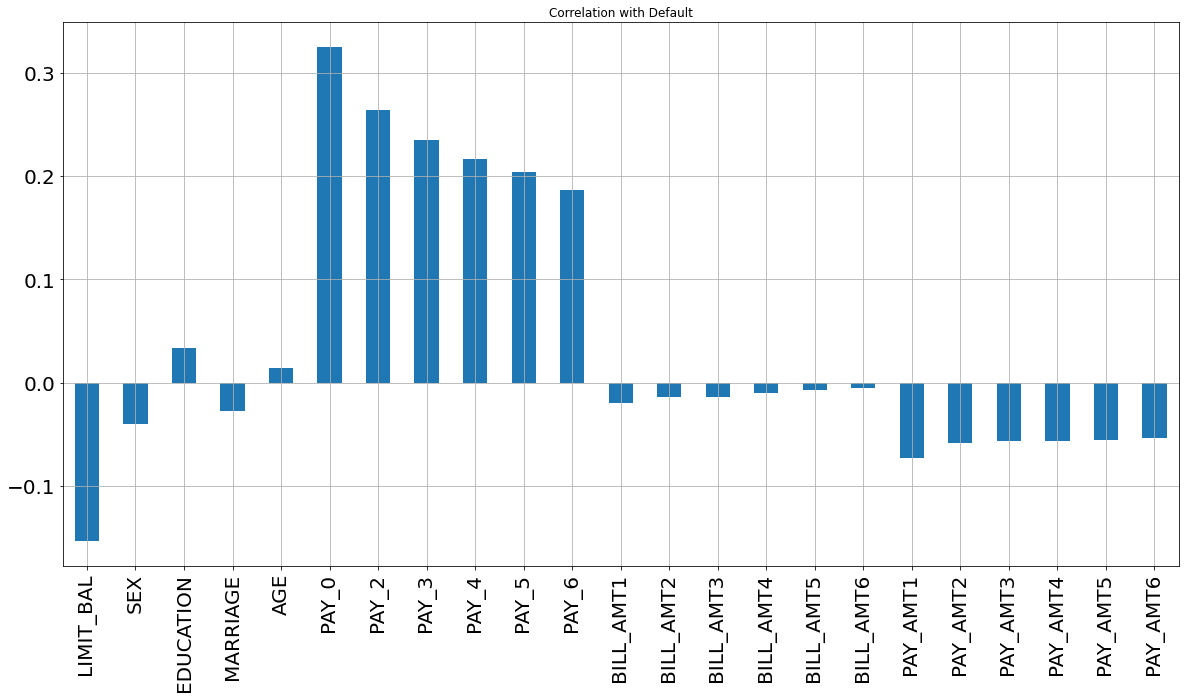

In [45]:
# explore relationship of variables with default
A = data.drop(['default payment next month'],axis=1)
B = data['default payment next month']

A.corrwith(data['default payment next month']).plot.bar(
        figsize = (20, 10), title = "Correlation with Default", fontsize = 20,
        rot = 90, grid = True)

<AxesSubplot:>

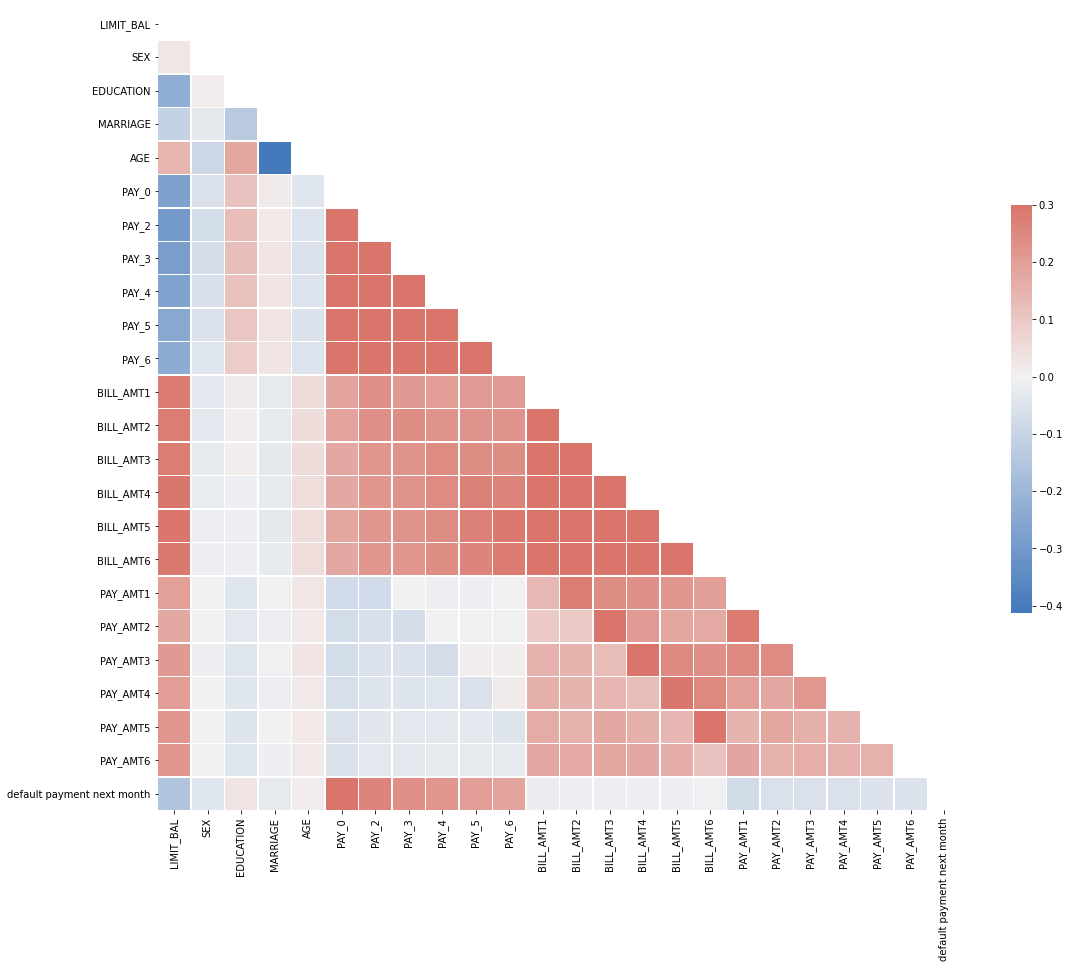

In [47]:
# explore relationship of variables

corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

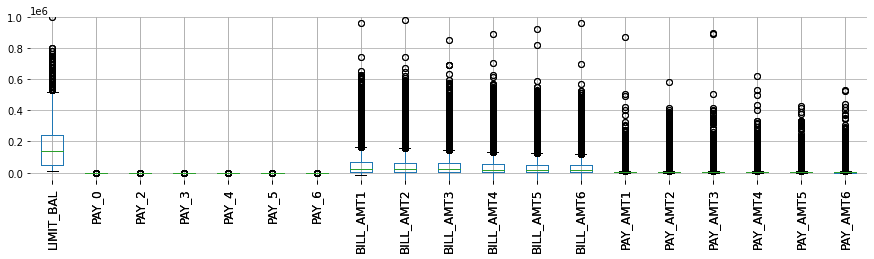

In [48]:
# Some data are distributed in a wide range
features = data.drop(['default payment next month','AGE','SEX','MARRIAGE','EDUCATION'], axis = 1, inplace = False)

plt.figure(figsize=(15,3))
ax= data.drop(['default payment next month','AGE','SEX','MARRIAGE','EDUCATION'], axis=1).boxplot(data.columns.name, rot=90)
outliers = dict()
ax= features.boxplot(features.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=12)
ax.set_ylim([-50000,1000000])
plt.box()

In [50]:
# We need to standardize and scale our data since our models are using DISTANCE to make predictions
stdX = (features - features.mean()) / (features.std())     #standardization of features

stdX.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136701,1.794534,1.782318,-0.696652,-0.666588,-1.530021,-1.486016,-0.642490,-0.647388,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377
1,-0.365974,-0.874977,1.782318,0.138862,0.188743,0.234913,1.992282,-0.659208,-0.666735,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875
2,-0.597192,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.298555,-0.493891,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122
3,-0.905483,0.014860,0.111734,0.138862,0.188743,0.234913,0.253133,-0.057490,-0.013292,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126
4,-0.905483,-0.874977,0.111734,-0.696652,0.188743,0.234913,0.253133,-0.578608,-0.611308,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183


In [112]:
# New dataset for modeling

data2 = data.drop(['LIMIT_BAL', 'PAY_0','PAY_2','PAY_3', 'PAY_4','PAY_5','PAY_6', 
                  'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                  'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis = 1)

data_st = pd.concat([data2,stdX.iloc[:,:]],axis=1)

data_st.head()

,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,1,24,1,-1.136701,1.794534,1.782318,-0.696652,-0.666588,...,-0.667982,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377
1,2,2,2,26,1,-0.365974,-0.874977,1.782318,0.138862,0.188743,...,-0.639244,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875
2,2,2,2,34,0,-0.597192,0.014860,0.111734,0.138862,0.188743,...,-0.482400,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122
3,2,2,1,37,0,-0.905483,0.014860,0.111734,0.138862,0.188743,...,0.032846,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126
4,1,2,1,57,0,-0.905483,-0.874977,0.111734,-0.696652,0.188743,...,-0.161186,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183


In [113]:
# Identify predictor and target variables
X = data_st.drop(['default payment next month'], axis=1)
y = data_st['default payment next month']

In [114]:
# Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

In [115]:
# Q3.1 Build kNN Model, 70% training set, 30% validation set

#kNN Model and prediction using k-fold Cross-validation approach
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score
#try k = 3
knn_cv = KNeighborsClassifier(n_neighbors=3)

#try 5-fold cross validation
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores.mean())

0.7741333333333332


In [116]:
# Q3.1 What value of k did you decide to use and why?
## We used k = 11 (odd number to avoid ties) using Elbow method as shown below
## Too small will lead to high variance in predictions and too large will lead to high bias in the model.
## Cross-validated mean squared error decreases rapidly until k = 11, then moves almost parallel to the X-axis (almost constant)

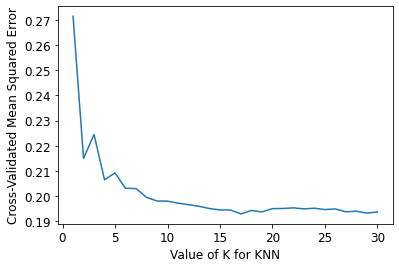

In [117]:
#how does increasing k impact the mean squared error of the model?
#running this may take a couple of minutes, please be patient :)
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = abs(cross_val_score(knn, X, y, cv=3, scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Mean Squared Error')
plt.show()

In [119]:
#try 11-fold cross validation
cv_scores3 = cross_val_score(knn_cv, X, y, cv=11)
print(cv_scores3.mean())

0.7739010093580228


In [63]:
# kNN Model, k = 11
knn_model = KNeighborsClassifier(n_neighbors = 11, p = 2)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
predicted_probas_knn = knn_model.predict_proba(X_test)

Confusion matrix

 [[6685  375]
 [1351  589]]

True Positives(TP1) =  6685

True Negatives(TN1) =  589

False Positives(FP1) =  375

False Negatives(FN1) =  1351


Text(0.5, 1.0, 'kNN Model (k=11) Confusion Matrix')

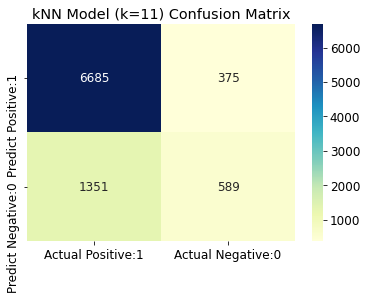

In [121]:
# Q3.2 Score kNN Model Confusion Matrix and ROC Curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## kNN Model (k=11) Confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP1) = ', cm[0,0])

print('\nTrue Negatives(TN1) = ', cm[1,1])

print('\nFalse Positives(FP1) = ', cm[0,1])

print('\nFalse Negatives(FN1) = ', cm[1,0])

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("kNN Model (k=11) Confusion Matrix")

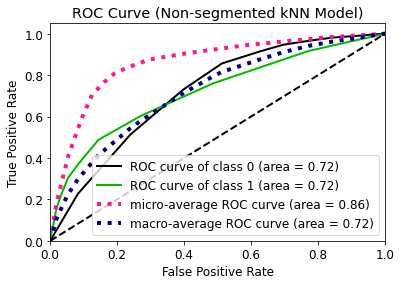

ROC AUC (Non-segmented kNN Model) : 0.7198


In [122]:
# Q3.2 Score kNN Model Confusion Matrix and ROC Curve
# kNN Model (k=11) ROC Curve

import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

skplt.metrics.plot_roc(y_test, predicted_probas_knn)
plt.title("ROC Curve (Non-segmented kNN Model)")
plt.show()

ROC_AUC_knn = roc_auc_score(y_test, predicted_probas_knn[:,1])


print('ROC AUC (Non-segmented kNN Model) : {:.4f}'.format(ROC_AUC_knn))

In [123]:
# Q3.3 kNN (non-Segmented) Model Metrics
from sklearn.metrics import accuracy_score

misclassification = (FP + FN)/float(TP + TN + FP + FN)
true_positive_rate = TP / float(TP + FN)
false_positive_rate = FP / float(FP + TN)
specificity = TN / (TN + FP)
precision = TP / float(TP + FP)
prevalence = (TP + FN)/float(TP + TN + FP + FN)


print('kNN Model Non-Segmented (k=11):')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knn)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification))
print('Precision : {0:0.4f}'.format(precision))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))
print('Prevalence : {0:0.4f}'.format(prevalence))
print('ROC AUC (kNN Model Non-Segmented (k=11)) : {:.4f}'.format(ROC_AUC_knn))

kNN Model Non-Segmented (k=11):
Model accuracy score: 0.8082
Misclassification Rate : 0.1918
Precision : 0.9469
True Positive Rate : 0.8319
False Positive Rate : 0.3890
Specificity : 0.6110
Prevalence : 0.8929
ROC AUC (kNN Model Non-Segmented (k=11)) : 0.7198


In [124]:
# Q3.4 Use k-means clustering to segment the customers on AGE. What value of k did you decide to use and why?
## We chose k = 3 using the Elbow Method as show below
## Within Cluster Sum of Squares decreases rapidly until k = 3 and then moves almost parallel to the X-axis (almost constant)

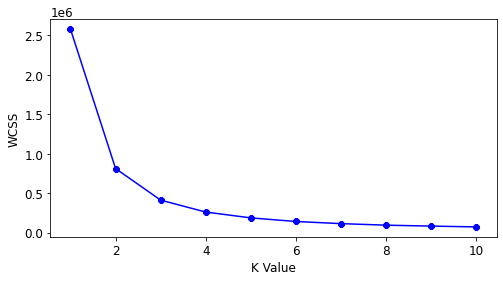

In [125]:
#preliminary analysis using BILL_AMT1 and AGE

test1 = data_st.loc[:,["AGE", "BILL_AMT1"]].values

#Elbow method
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init ="k-means++")
    kmeans.fit(test1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (8,4))
plt.plot(range(1,11), wcss, color = "blue", marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

#Within Cluster Sum of Squares decreases rapidly until k = 3 and then moves almost parallel to the X-axis (almost constant)
#We chose k = 3

In [126]:
# Q3.4 k-means Clustering

test2 = data_st.loc[:,["AGE", "BILL_AMT1"]].values
kmeans_model = KMeans(n_clusters = 3)
kmeans_model.fit(test2)
y_pred_kmeans = kmeans_model.predict(test2)

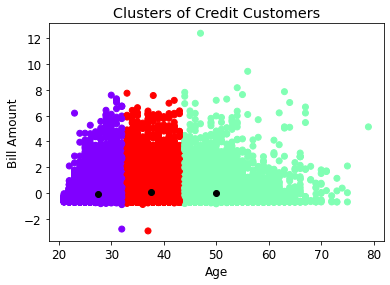

In [127]:
# visualize clusters and centroids
plt.scatter(test2[:,0],test2[:,1], c=kmeans_model.labels_, cmap='rainbow')
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color = "black")
plt.title('Clusters of Credit Customers')
plt.xlabel('Age')
plt.ylabel('Bill Amount')
plt.show()

In [128]:
# Q3.5 Build a model of default using kNN for each segment

## Segment 1 = Age 20 to 32
## Segment 2 = Age 33 to 42
## Segment 3 = Age 43 to 80


#We used k = 11 (odd number to avoid ties) using Elbow method as shown above
#Too small will lead to high variance in predictions and too large will lead to high bias in the model.
#Cross-validated mean squared error decreases rapidly until k = 11, then moves almost parallel to the X-axis (almost constant)

In [129]:
# Q3.5 Segment 1 = Age 20 to 32

segment1 = data_st[(data['AGE'] > 20) & (data['AGE'] < 33)]

X1 = segment1.drop(['default payment next month'], axis=1)
y1 = segment1['default payment next month']

#split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

#check the shape of X_train and X_test
X1_train.shape, X1_test.shape

((9371, 23), (4017, 23))

In [130]:
# Q3.5 Segment 1 kNN Model

knn_model1 = KNeighborsClassifier(n_neighbors = 11, p = 2)
knn_model1.fit(X1_train, y1_train)
y_pred_knn1 = knn_model.predict(X1_test)
predicted_probas_knn1 = knn_model1.predict_proba(X1_test)

In [131]:
# Q3.5 Segment 2 = Age 33 to 42

segment2 = data_st[(data['AGE'] > 32) & (data['AGE'] < 43)]

X2 = segment2.drop(['default payment next month'], axis=1)
y2 = segment2['default payment next month']

#split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

#check the shape of X_train and X_test
X2_train.shape, X2_test.shape

((6969, 23), (2987, 23))

In [132]:
# Q3.5 Segment 2 kNN Model

knn_model2= KNeighborsClassifier(n_neighbors = 11, p = 2)
knn_model2.fit(X2_train, y2_train)
y_pred_knn2 = knn_model.predict(X2_test)
predicted_probas_knn2 = knn_model2.predict_proba(X2_test)

In [133]:
# Q3.5 Segment 3 = Age 43 to 80

segment3 = data_st[(data['AGE'] > 42) & (data['AGE'] < 81)]

X3 = segment3.drop(['default payment next month'], axis=1)
y3 = segment3['default payment next month']

#split data
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 0)

#check the shape of X_train and X_test
X3_train.shape, X3_test.shape

((4659, 23), (1997, 23))

In [134]:
# Q3.5 Segment 3 kNN Model

knn_model3 = KNeighborsClassifier(n_neighbors = 11, p = 2)
knn_model3.fit(X3_train, y3_train)
y_pred_knn3 = knn_model.predict(X3_test)
predicted_probas_knn3 = knn_model3.predict_proba(X3_test)

In [135]:
# Q3.6 kNN Model Metrics for each Segment

Confusion matrix

 [[3002  159]
 [ 554  302]]

True Positives(TP1) =  3002

True Negatives(TN1) =  302

False Positives(FP1) =  159

False Negatives(FN1) =  554


Text(0.5, 1.0, 'kNN Model Segment 1 (k=11) Confusion Matrix')

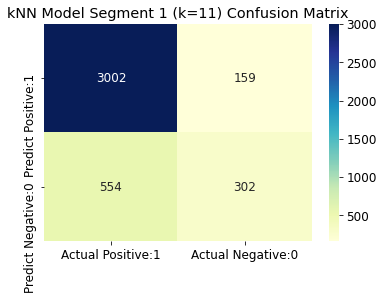

In [136]:
# Q3.6 Segment 1 kNN Model Confusion Matrix

cm1 = confusion_matrix(y1_test, y_pred_knn1)

TP1 = cm1[0,0]
TN1 = cm1[1,1]
FP1 = cm1[0,1]
FN1 = cm1[1,0]


print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("kNN Model Segment 1 (k=11) Confusion Matrix")

Confusion matrix

 [[2240  102]
 [ 428  217]]

True Positives(TP1) =  2240

True Negatives(TN1) =  217

False Positives(FP1) =  102

False Negatives(FN1) =  428


Text(0.5, 1.0, 'kNN Model Segment 2 (k=11) Confusion Matrix')

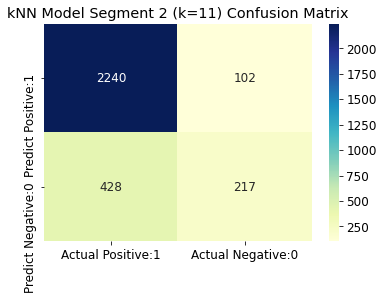

In [137]:
# Q3.6 Segment 2 kNN Model Confusion Matrix

cm2 = confusion_matrix(y2_test, y_pred_knn2)

TP2 = cm2[0,0]
TN2 = cm2[1,1]
FP2 = cm2[0,1]
FN2 = cm2[1,0]


print('Confusion matrix\n\n', cm2)

print('\nTrue Positives(TP1) = ', cm2[0,0])

print('\nTrue Negatives(TN1) = ', cm2[1,1])

print('\nFalse Positives(FP1) = ', cm2[0,1])

print('\nFalse Negatives(FN1) = ', cm2[1,0])

cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("kNN Model Segment 2 (k=11) Confusion Matrix")

Confusion matrix

 [[1462   75]
 [ 288  172]]

True Positives(TP1) =  1462

True Negatives(TN1) =  172

False Positives(FP1) =  75

False Negatives(FN1) =  288


Text(0.5, 1.0, 'kNN Model Segment 3 (k=11) Confusion Matrix')

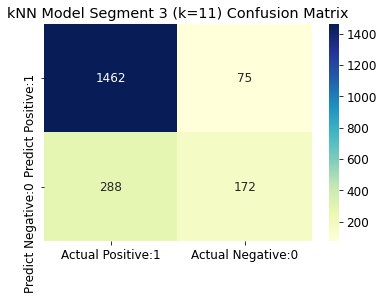

In [138]:
# Q3.6 Segment 3 kNN Model Confusion Matrix

cm3 = confusion_matrix(y3_test, y_pred_knn3)

TP3 = cm3[0,0]
TN3 = cm3[1,1]
FP3 = cm3[0,1]
FN3 = cm3[1,0]


print('Confusion matrix\n\n', cm3)

print('\nTrue Positives(TP1) = ', cm3[0,0])

print('\nTrue Negatives(TN1) = ', cm3[1,1])

print('\nFalse Positives(FP1) = ', cm3[0,1])

print('\nFalse Negatives(FN1) = ', cm3[1,0])

cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("kNN Model Segment 3 (k=11) Confusion Matrix")

In [139]:
# Q3.7 Segment 1 kNN Model Metrics

misclassification = (FP1 + FN1)/float(TP1 + TN1 + FP1 + FN1)
true_positive_rate = TP1 / float(TP1 + FN1)
false_positive_rate = FP1 / float(FP1 + TN1)
specificity = TN1 / (TN1 + FP1)
precision = TP1 / float(TP1 + FP1)
prevalence = (TP1 + FN1)/float(TP1 + TN1 + FP1 + FN1)
ROC_AUC_knn1 = roc_auc_score(y1_test, predicted_probas_knn1[:,1])

print('kNN Model (Segment 1):')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y1_test, y_pred_knn1)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification))
print('Precision : {0:0.4f}'.format(precision))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))
print('Prevalence : {0:0.4f}'.format(prevalence))
print('ROC AUC (kNN Model (Segment 1)) : {:.4f}'.format(ROC_AUC_knn1))

kNN Model (Segment 1):
Model accuracy score: 0.8225
Misclassification Rate : 0.1775
Precision : 0.9497
True Positive Rate : 0.8442
False Positive Rate : 0.3449
Specificity : 0.6551
Prevalence : 0.8852
ROC AUC (kNN Model (Segment 1)) : 0.7299


In [140]:
# Q3.7 Segment 2 kNN Model Metrics

misclassification = (FP2 + FN2)/float(TP2 + TN2 + FP2 + FN2)
true_positive_rate = TP2 / float(TP2 + FN2)
false_positive_rate = FP2 / float(FP1 + TN1)
specificity = TN2 / (TN2 + FP2)
precision = TP2 / float(TP2 + FP2)
prevalence = (TP2 + FN2)/float(TP2 + TN2 + FP2 + FN2)
ROC_AUC_knn2 = roc_auc_score(y2_test, predicted_probas_knn2[:,1])

print('kNN Model (Segment 2):')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y2_test, y_pred_knn2)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification))
print('Precision : {0:0.4f}'.format(precision))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))
print('Prevalence : {0:0.4f}'.format(prevalence))
print('ROC AUC (kNN Model (Segment 2)) : {:.4f}'.format(ROC_AUC_knn2))

kNN Model (Segment 2):
Model accuracy score: 0.8226
Misclassification Rate : 0.1774
Precision : 0.9564
True Positive Rate : 0.8396
False Positive Rate : 0.2213
Specificity : 0.6803
Prevalence : 0.8932
ROC AUC (kNN Model (Segment 2)) : 0.7202


In [155]:
# Q3.7 Segment 3 kNN Model Metrics

misclassification = (FP3 + FN3)/float(TP3 + TN3 + FP3 + FN3)
true_positive_rate = TP3 / float(TP3 + FN3)
false_positive_rate = FP3 / float(FP3 + TN3)
specificity = TN3 / (TN3 + FP3)
precision = TP3 / float(TP2 + FP3)
prevalence = (TP3 + FN3)/float(TP3 + TN3 + FP3 + FN3)
ROC_AUC_knn3 = roc_auc_score(y3_test, predicted_probas_knn3[:,1])

print('kNN Model (Segment 3):')
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y3_test, y_pred_knn3)))
print('Misclassification Rate : {0:0.4f}'.format(misclassification))
print('Precision : {0:0.4f}'.format(precision))
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
print('Specificity : {0:0.4f}'.format(specificity))
print('Prevalence : {0:0.4f}'.format(prevalence))
print('ROC AUC (kNN Model (Segment 3)) : {:.4f}'.format(ROC_AUC_knn3))

kNN Model (Segment 3):
Model accuracy score: 0.8182
Misclassification Rate : 0.1818
Precision : 0.6315
True Positive Rate : 0.8354
False Positive Rate : 0.3036
Specificity : 0.6964
Prevalence : 0.8763
ROC AUC (kNN Model (Segment 3)) : 0.7135


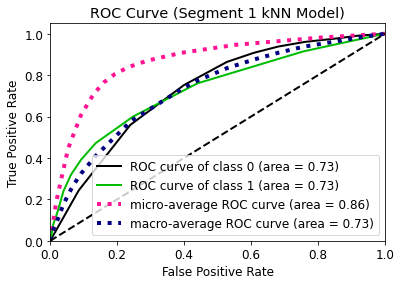

ROC AUC (Segment 1) : 0.7299


In [142]:
# Q3.8 Segment 1 kNN Model ROC Curve

skplt.metrics.plot_roc(y1_test, predicted_probas_knn1)
plt.title("ROC Curve (Segment 1 kNN Model)")
plt.show()

ROC_AUC_knn1 = roc_auc_score(y1_test, predicted_probas_knn1[:,1])

print('ROC AUC (Segment 1) : {:.4f}'.format(ROC_AUC_knn1))

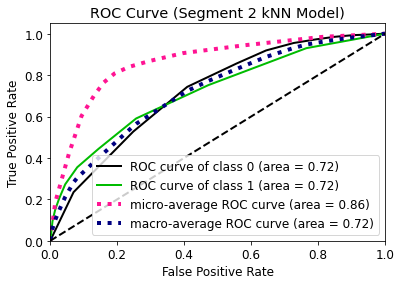

ROC AUC (Segment 2) : 0.7202


In [143]:
# Q3.8 Segment 2 kNN Model ROC Curve

skplt.metrics.plot_roc(y2_test, predicted_probas_knn2)
plt.title("ROC Curve (Segment 2 kNN Model)")
plt.show()

ROC_AUC_knn2 = roc_auc_score(y2_test, predicted_probas_knn2[:,1])

print('ROC AUC (Segment 2) : {:.4f}'.format(ROC_AUC_knn2))

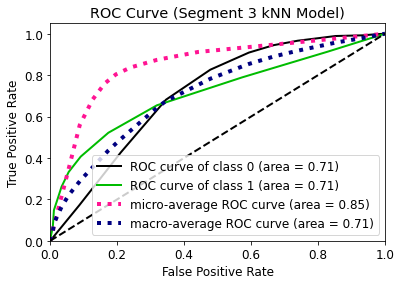

ROC AUC (Segment 3) : 0.7135


In [144]:
# Q3.8 Segment 3 kNN Model ROC Curve

skplt.metrics.plot_roc(y3_test, predicted_probas_knn3)
plt.title("ROC Curve (Segment 3 kNN Model)")
plt.show()

ROC_AUC_knn3 = roc_auc_score(y3_test, predicted_probas_knn3[:,1])

print('ROC AUC (Segment 3) : {:.4f}'.format(ROC_AUC_knn3))

In [145]:
# Q3.9 Compare the kNN Models (segments vs non-segmented)

## kNN models for segments 1 and 2 based on AGE have minimally higher ROC AUC compared to the non-segmented model.
## Segement 3 has a slightly lower ROC AUC.

a = ROC_AUC_knn
b = ROC_AUC_knn1
c = ROC_AUC_knn2
d = ROC_AUC_knn3

e = (b/a - 1)
f = (c/a - 1)
g = (d/a -1)

print('ROC AUC (Non-segmented) : {:.4f}'.format(ROC_AUC_knn))

print('ROC AUC (Segment 1) : {:.4f}'.format(ROC_AUC_knn1))
print('Growth vs non-segmented : {:.4f}'.format(e))

print('ROC AUC (Segment 2) : {:.4f}'.format(ROC_AUC_knn2))
print('Growth vs non-segmented : {:.4f}'.format(f))

print('ROC AUC (Segment 3) : {:.4f}'.format(ROC_AUC_knn3))
print('Growth vs non-segmented : {:.4f}'.format(g))




ROC AUC (Non-segmented) : 0.7198
ROC AUC (Segment 1) : 0.7299
Growth vs non-segmented : 0.0141
ROC AUC (Segment 2) : 0.7202
Growth vs non-segmented : 0.0005
ROC AUC (Segment 3) : 0.7135
Growth vs non-segmented : -0.0087


In [146]:
#Q4. Neural Network Model
from sklearn.neural_network import MLPClassifier

In [147]:
#Convert categorical variables
categorical = data[['SEX', 'EDUCATION', 'MARRIAGE']]
categorical

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1
...,...,...,...
29995,1,3,1
29996,1,3,2
29997,1,2,2
29998,1,3,1


In [148]:
# Q4.1 Build a model of default using ANN. Randomly partition the data into a training set (70%) and a validation set (30%).
X = data.drop(['default payment next month'], axis=1)
y = data['default payment next month']
#Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.metrics import make_scorer, accuracy_score
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.3, random_state=100)

from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann_parameters = {'hidden_layer_sizes': [(100,1), (100,2), (100,3)],
                  'alpha': [.0001, .001, .01, .1, 1],
                 }

acc_scorer5 = make_scorer(accuracy_score)

ann.fit(X_train5, y_train5)


MLPClassifier()

In [149]:
#check the shape of X_train and X_test
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

In [150]:
#fit the model
clf = MLPClassifier(hidden_layer_sizes=(12,5),max_iter=1000, random_state=25,shuffle=True, verbose=False)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(12, 5), max_iter=1000, random_state=25)

In [151]:
#predict
y_pred_clf = clf.predict(X_test)
y_train_score_clf = clf.predict(X_train)

Confusion matrix

 [[7058    2]
 [1939    1]]

True Positives(TP) =  7058

True Negatives(TN) =  1

False Positives(FP) =  2

False Negatives(FN) =  1939


Text(0.5, 1.0, 'Neural Network Model Confusion Matrix')

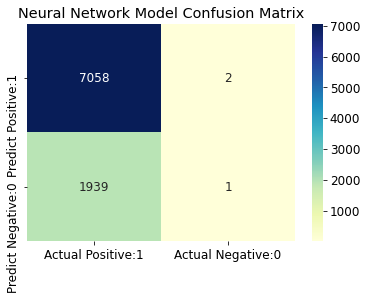

In [152]:
# Q4.2 Score the validation data (predict) using the model. Produce a confusion table and an ROC for the scored validation data. 
## Neural Network Model Confusion Table
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm_ann = confusion_matrix(y_test, y_pred_clf)

TP4 = cm_ann[0,0]
TN4 = cm_ann[1,1]
FP4 = cm_ann[0,1]
FN4 = cm_ann[1,0]

print('Confusion matrix\n\n', cm_ann)

print('\nTrue Positives(TP) = ', cm_ann[0,0])

print('\nTrue Negatives(TN) = ', cm_ann[1,1])

print('\nFalse Positives(FP) = ', cm_ann[0,1])

print('\nFalse Negatives(FN) = ', cm_ann[1,0])

cm_ann_matrix = pd.DataFrame(data=cm_ann, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_ann_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Neural Network Model Confusion Matrix")

In [153]:
# Q4.3  Neural Network Model Metrics
Total5=sum(sum(cm_ann))

#from confusion matrix calculate accuracy
Accuracy5=(cm_ann[0,0]+cm_ann[1,1])/Total5
print ('Model accuracy score : ', Accuracy5)

Precision5=(cm_ann[0,0])/(cm_ann[0,0] + cm_ann[1,0])
print ('Precision : ', Precision5)
            
print ('Misclassification Rate : ', 1-Accuracy5)

Sensitivity5 = cm_ann[0,0]/(cm_ann[0,0]+cm_ann[0,1])
print('Sensitivity/True Positive Rate : ', Sensitivity5)

Specificity5 = cm_ann[1,1]/(cm_ann[1,0]+cm_ann[1,1])
print('Specificity/True Negative Rate : ', Specificity5)

Prevalence5 = (cm_ann[0,0])/Total5
print('Prevalence : ', Prevalence5)

Model accuracy score :  0.7843333333333333
Precision :  0.784483716794487
Misclassification Rate :  0.21566666666666667
Sensitivity/True Positive Rate :  0.9997167138810198
Specificity/True Negative Rate :  0.0005154639175257732
Prevalence :  0.7842222222222223


ROC AUC : 0.6855


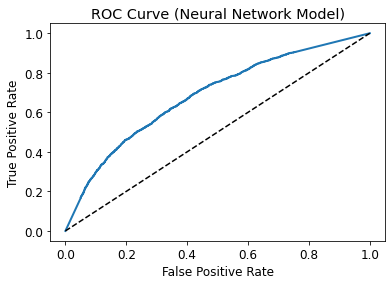

In [154]:
# ROC for Neural Model
from sklearn.metrics import roc_curve
y_prob_pred4 = ann.predict_proba(X_test5)[:, 1]

ROC_AUC4 = roc_auc_score(y_test5, y_prob_pred4)

print('ROC AUC : {:.4f}'.format(ROC_AUC4))

fpr4, tpr4, thresholds4 = roc_curve(y_test5, y_prob_pred4)

plt.figure(figsize=(6,4))

plt.plot(fpr4, tpr4, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC Curve (Neural Network Model)')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

In [110]:
# Q5: Compare Models
## We prefer to use kNN models for each of the segment derived from k-means clustering based on model accuracy 
#and precision when predicting yes (default).
## We recognize that there might be differences within segments and
## that these can be captured by using this approach and will contribute to a more accurate prediction of default.

print("Compare ROC AUC:")
print('ROC AUC (Non-segmented) : {:.4f}'.format(ROC_AUC_knn))
print('ROC AUC (Segment 1) : {:.4f}'.format(ROC_AUC_knn1))
print('ROC AUC (Segment 2) : {:.4f}'.format(ROC_AUC_knn2))
print('ROC AUC (Segment 3) : {:.4f}'.format(ROC_AUC_knn3))
print('ROC AUC (ANN) : {:.4f}'.format(ROC_AUC4))


print("Compare Model Accuracy:")
print('kNN Non-Segmented: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knn)))
print('kNN Segment 1: {0:0.4f}'. format(accuracy_score(y1_test, y_pred_knn1)))
print('kNN Segment 2: {0:0.4f}'. format(accuracy_score(y2_test, y_pred_knn2)))
print('kNN Segment 3: {0:0.4f}'. format(accuracy_score(y3_test, y_pred_knn3)))

print ('ANN Model: {0:0.4f}'. format(Accuracy5))



Compare ROC AUC:
ROC AUC (Non-segmented) : 0.7198
ROC AUC (Segment 1) : 0.7299
ROC AUC (Segment 2) : 0.7202
ROC AUC (Segment 3) : 0.7135
ROC AUC (ANN) : 0.5908
Compare Model Accuracy:
kNN Non-Segmented: 0.8082
kNN Segment 1: 0.8225
kNN Segment 2: 0.8226
kNN Segment 3: 0.8182
ANN Model: 0.7843
